In [2]:
with open("./acchamber2.log") as f:
    print f.readline()
    f.close()

[{"name": "temp1", "value": 20.5, "time": 1461130410.956896}, {"name": "humidity1", "value": 28.100000381469727, "time": 1461130410.956896}, {"name": "temp2", "value": 20.600000381469727, "time": 1461130411.486656}, {"name": "humidity2", "value": 30.0, "time": 1461130411.486656}, {"name": "temp3", "value": 20.600000381469727, "time": 1461130412.016656}, {"name": "humidity3", "value": 35.599998474121094, "time": 1461130412.016656}]



In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pp

import numpy as np
import datetime
import json

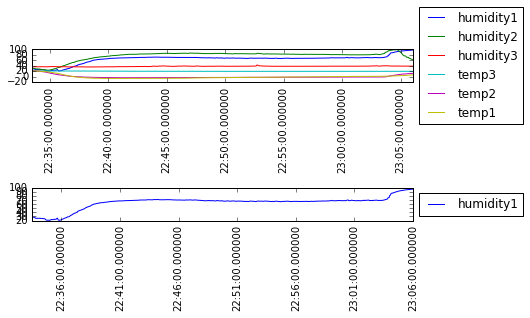

In [105]:
with open("./acchamber2.log") as f:
    # humidity1_time = np.array([])
    # humidity1_value = np.array([])
    # temperature1_time = np.array([])
    # temperature1_value = np.array([])
    # humidity2_time = np.array([])
    # humidity2_value = np.array([])
    # temperature2_time = np.array([])
    # temperature2_value = np.array([])
    # humidity3_time = np.array([])
    # humidity3_value = np.array([])
    # temperature3_time = np.array([])
    # temperature3_value = np.array([])
    
    sensors = {
        'temp1': [],
        'humidity1': [],
        'temp2': [],
        'humidity2': [],
        'temp3': [],
        'humidity3': []
    }
    
    
    for line in f:
        data = json.loads(line)
        
        for entry in data:
            record = {
                'value': entry['value'],
                'time': entry['time']
            }
            sensors[entry['name']].append(record)
            
    sensor_plots = {}
    
    for name, sensor_data in sensors.iteritems():
        sensor_plots[name] = {}
        sensor_plots[name]['time'] = []
        sensor_plots[name]['value'] = []
        for data in sensor_data:
            parsed_time = datetime.datetime.fromtimestamp(data['time'])
            sensor_plots[name]['time'].append(parsed_time)
            sensor_plots[name]['value'].append(data['value'])
        
f.close()

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)
for key, value in sensor_plots.iteritems():
    ax1.plot(value['time'],value['value'], label=key)
    
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
ax2.plot(sensor_plots['humidity1']['time'],sensor_plots['humidity1']['value'], label='humidity1')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.setp(ax1.get_xticklabels(),rotation='vertical')
plt.setp(ax2.get_xticklabels(),rotation='vertical')

plt.show()